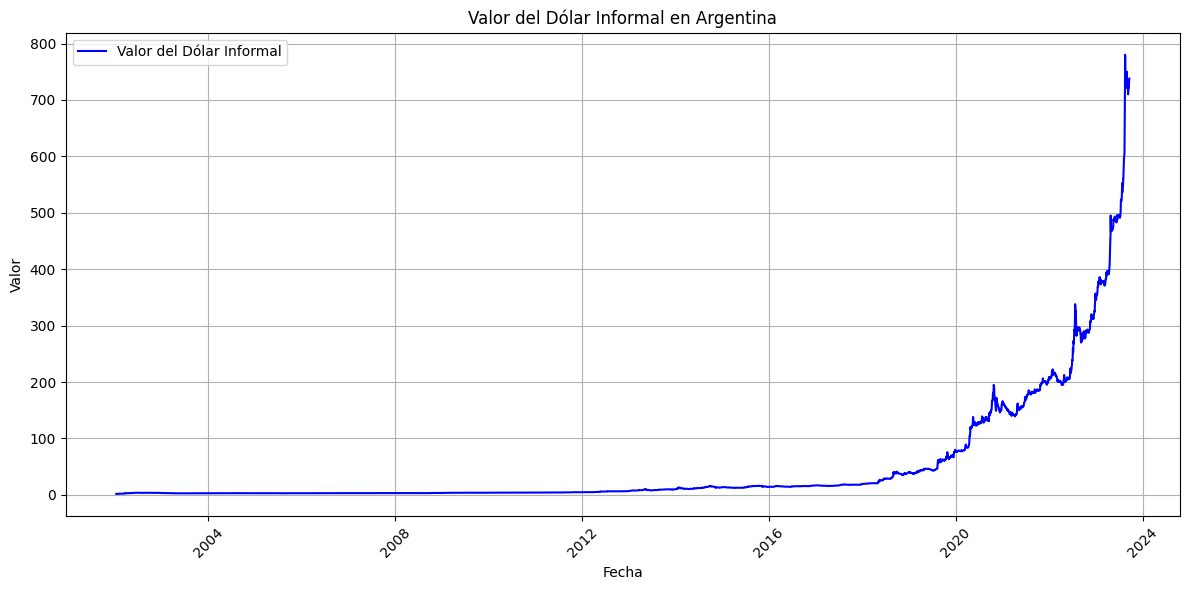

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Función para obtener datos
def obtener_datos(url):
    try:
        resp = requests.get(url)
        resp.raise_for_status()  # Manejo de errores HTTP
        data = resp.json()[1:]
        df = pd.DataFrame(data, columns=['Date', 'Blue'])
        df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
        df['Día'] = df['Date'].dt.day
        df['Mes'] = df['Date'].dt.month
        df['Año'] = df['Date'].dt.year
        df.rename(columns={'Blue': 'Valor'}, inplace=True)
        return df
    except Exception as e:
        print(f"Error al obtener datos: {str(e)}")
        return None

# Función para graficar los datos
def graficar_datos(df):
    if df is not None:
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df['Valor'], label='Valor del Dólar Informal', color='blue')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.title('Valor del Dólar Informal en Argentina')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()

# URL de los datos
url = 'https://mercados.ambito.com//dolar/informal/grafico/2000-03-21/2023-09-18'

# Obtener y graficar los datos
datos_df = obtener_datos(url)
if datos_df is not None:
    graficar_datos(datos_df)
